In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
x = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.linear_model import LinearRegression
L = LinearRegression()

In [7]:
L.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = L.predict(x_test)

In [9]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

2900.19362849348

In [10]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)
r2_score

0.4526027629719197

In [11]:
rmse = np.sqrt(mse)
rmse

np.float64(53.853445836765914)

In [12]:
#Applying Ridge regression

In [13]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [14]:
R.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [15]:
print(R.fit(x_train,y_train))

Ridge(alpha=0.0001)


In [16]:
y_pred1 = R.predict(x_test)

In [17]:
mse = mean_squared_error(y_test,y_pred1)
mse

2899.679429885329

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred1)
r2

0.45269981542201143

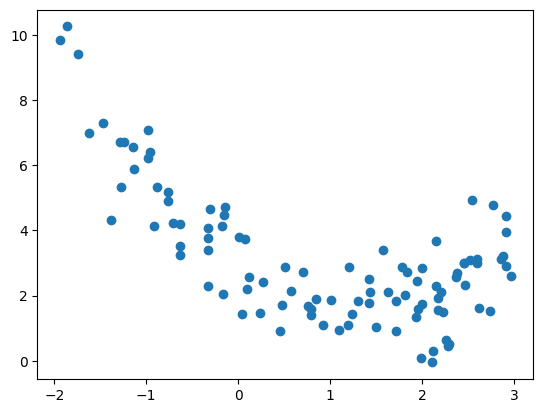

In [19]:
m = 100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2 - 2*x1+3+np.random.randn(m,1)
plt.scatter(x1,x2)
plt.show()

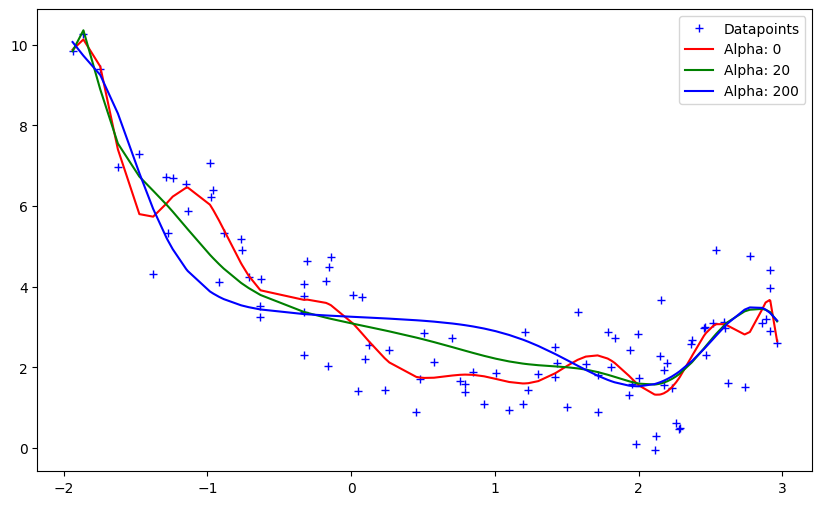

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
def get_preds_ridge(x1,x2,alpha):
    model=Pipeline([('poly_feats',PolynomialFeatures(degree=16)),('ridge',Ridge(alpha=alpha))])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.plot(x1,x2,'b+',label='Datapoints')

for alpha,c in zip(alphas,cs):
    preds = get_preds_ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [21]:
#From scratch

In [22]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [23]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

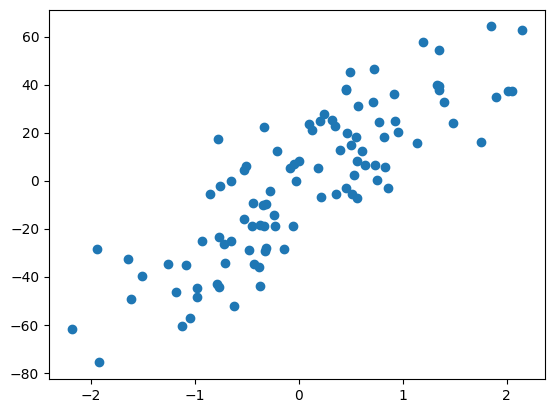

In [24]:
plt.scatter(x,y)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [27]:
from sklearn.linear_model import Ridge

In [28]:
rr = Ridge(alpha=10)
rr.fit(x,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [29]:
rr1 = Ridge(alpha=100)
rr1.fit(x,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


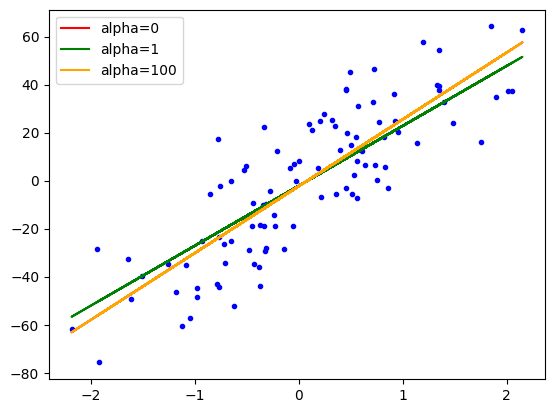

In [30]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color='red',label='alpha=0')
plt.plot(x,rr.predict(x),color='green',label='alpha=1')
plt.plot(x,lr.predict(x),color='orange',label='alpha=100')
plt.legend()
plt.show()

In [31]:
class MyRidge:
    def __init__ (self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self,x_train,y_train):
        num = 0
        den = 0
        for i in range(x_train.shape[0]):
            num = num+(y_train[i] - y_train.mean())*(x_train[i] - x_train.mean())
            den = den+(x_train[i] - x_train.mean())*(x_train[i] - x_train.mean())
        self.m = num/den+self.alpha
        self.b = y_train.mean() - (self.m*x_train.mean())
        print(self.m,self.b)
    def predict(x_test):
        pass

In [32]:
reg = MyRidge(alpha=10)

In [33]:
reg.fit(x,y)

[37.82809103] [-2.87881847]


In [34]:
reg = MyRidge(alpha=100)
reg.fit(x,y)

[127.82809103] [-8.13548367]


In [35]:
#Part 2

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [38]:
x,y = load_diabetes(return_X_y = True)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=4)

In [41]:
from sklearn.linear_model import Ridge

In [42]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [43]:
reg.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [44]:
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [45]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [48]:
class MyRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.coef = None
        self.intercept = None
    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])
        result = np.linalg.inv(np.dot(x_train.T,x_train)+self.alpha*I).dot(x_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_
        

In [49]:
reg = MyRidge()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46921361559931896
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023164


In [50]:
#Ridge Regression using Gradient Descent

In [52]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [53]:
x,y = load_diabetes(return_X_y=True)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [56]:
from sklearn.linear_model import SGDRegressor

In [60]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [61]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("R2_Score: ",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2_Score:  0.4307154841814622
[  44.92925119 -171.03506129  376.23161728  275.29621345  -11.16481045
  -63.17126986 -165.260559    133.74799574  333.31617965   90.44296779]
[143.42920928]


In [62]:
#2nd Method

In [63]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.001,max_iter=500,solver='sparse_cg')

In [64]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print("R2 score: ",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score:  0.46250101619914563
[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466


In [74]:
class MyRidgeGD:
    def __init__(self,epochs,learning_rate,alpha):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    def fit(self,x_train,y_train):
        self.coef_ = np.ones(x_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(x_train,0,1,axis=1)
        for i in range(self.epochs):
            thetha_der = np.dot(x_train.T,x_train).dot(thetha) - np.dot(x_train.T,y_train)-self.alpha*thetha
            thetha = thetha-self.learning_rate*thetha_der
        self.coef_ = thetha[1:] 
        self.intercept_ = thetha[0]
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [75]:
reg = MyRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [76]:
reg.fit(x_train,y_train)

ValueError: shapes (10,10) and (353,11) not aligned: 10 (dim 1) != 353 (dim 0)

In [77]:
import numpy as np

class MyRidgeGD:
    def __init__(self, epochs, learning_rate, alpha):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        m, n = x_train.shape
        X_b = np.insert(x_train, 0, 1, axis=1)  # shape: (m, n+1)
        theta = np.zeros(n + 1)

        for i in range(self.epochs):
            y_pred = X_b.dot(theta)
            error = y_pred - y_train
            # Gradient of loss + regularization (don't regularize bias term)
            gradient = (2/m) * X_b.T.dot(error) + 2 * self.alpha * np.r_[0, theta[1:]]
            theta -= self.learning_rate * gradient

        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, x_test):
        return np.dot(x_test, self.coef_) + self.intercept_

In [78]:
reg = MyRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [79]:
reg.fit(x_train,y_train)

In [80]:
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46250101619914563
[ 3.90354866  0.18338464 10.58104621  8.67843468  3.78653185  2.74914699
 -7.0579352   7.78656644 10.61639306  6.64605418]
150.63310856367247
